In [315]:
import random
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

# from numpy.random import Generator, MT19937
# random = Generator(MT19937(0))

In [316]:
def set_rand_seed(seed = 0):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    np.random.seed(seed)

In [317]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

# Create Simple DataSet

## Generation PV

In [318]:
def get_generation_PV():
    # Generation
    x = np.linspace(0, 23, 24)

    # Create generation curve with randomness
    y_perf = np.sin((x/4) + 5)
    set_rand_seed(0)
    y_gen = y_perf + np.random.normal(0, 0.1, 24)
    # Clip to 0
    y_perf = y_perf.clip(0)
    y_gen = y_gen.clip(0)
    # Adjust
    y_gen = y_gen * 1500
    y_perf = y_perf *1500

    return y_gen, y_perf, x

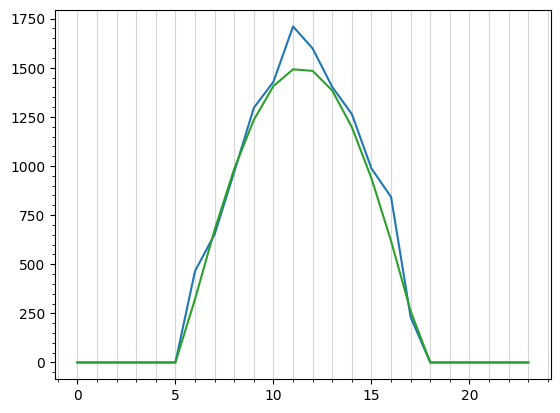

In [319]:
# Generation
y_gen, y_perf, x, = get_generation_PV()

# Plotting
plt.plot(x, y_gen)
plt.plot(x, y_perf, 'tab:green')
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

## Demand 

### Demand 1 - Family

In [320]:
def get_demand_h1(temp):
    set_rand_seed(0)
    y_base = np.array([60 for i in range(24)])
    usage = np.array([0,0,0,0,0,300,1000,1200,300,0,0,0,0,0,0,400,500,500,800,1000,800,300,100,0])
    y_demand_1 = y_base + usage +((np.abs(temp - 22)) * 50 ) + np.random.normal(0, 60, 24)
    return y_demand_1, usage

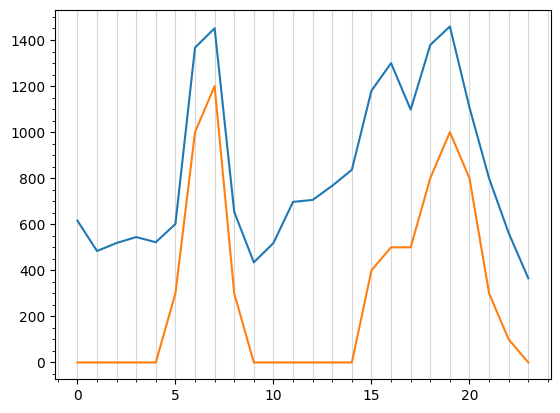

In [321]:
# Consider temperature
x = np.linspace(0, 23, 24)

# Add Noise and temperature offset
temp = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29])
y_demand_1, usage = get_demand_h1(temp)

# Plotting
plt.plot(x, y_demand_1)
plt.plot(x, usage)
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

### Demand 2 - Teenagers

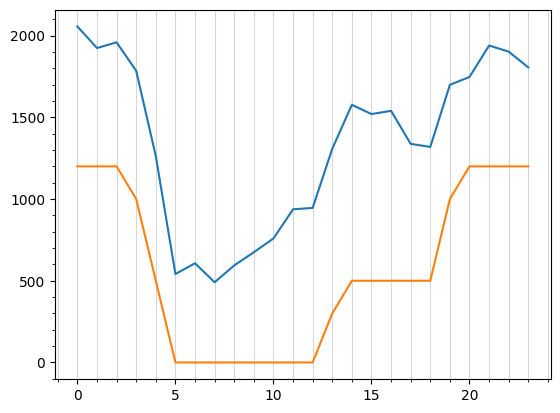

In [322]:
# Consider temperature
x = np.linspace(0, 23, 24)

y_base = np.array([300 for i in range(24)])
usage = np.array([1200,1200,1200,1000,500,0,0,0,0,0,0,0,0,300,500,500,500,500,500,1000,1200,1200,1200,1200])
set_rand_seed(0)

# Add Noise and temperature offset
temp = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29])
y_demand_2 = y_base + usage +((temp - 22) * 50 ) + np.random.normal(0, 60, 24)

# Plotting
plt.plot(x, y_demand_2)
plt.plot(x, usage)
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

### Demand 3 - House Business

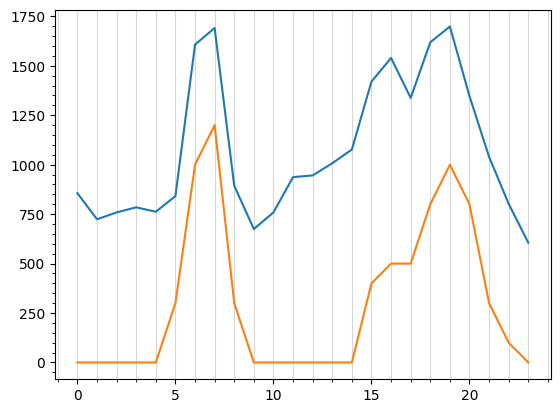

In [323]:
# Consider temperature
x = np.linspace(0, 23, 24)

y_base = np.array([300 for i in range(24)])
usage = np.array([0,0,0,0,0,300,1000,1200,300,0,0,0,0,0,0,400,500,500,800,1000,800,300,100,0])
set_rand_seed(0)

# Add Noise and temperature offset
temp = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29])
y_demand_3 = y_base + usage +((temp - 22) * 50 ) + np.random.normal(0, 60, 24)

# Plotting
plt.plot(x, y_demand_3)
plt.plot(x, usage)
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)

## Grid Electricity Price and C02

In [324]:
def get_grid_prices_day():
    # The grid has only 1 nuclear and 1 gas stations
    # Nuclear Power is a baseline and always generates the same amount of energy
    y_nuclear = np.array([1000 for i in range(24)])
    # Gas Power is variable and has a higher cost in terms of co2 and price
    y_gas = np.array([0,0,0,0,0,0,300,600,1000,600,300,300,300,300,600,1000,600,300,0,0,0,0,0,0])

    y_elec = y_nuclear + y_gas
    y_elec_price = y_nuclear * 0.10 + y_gas * 0.30
    y_elec_carbon = y_nuclear * 0.01 + y_gas * 0.2
    return y_elec, y_elec_price, y_elec_carbon, y_nuclear, y_gas

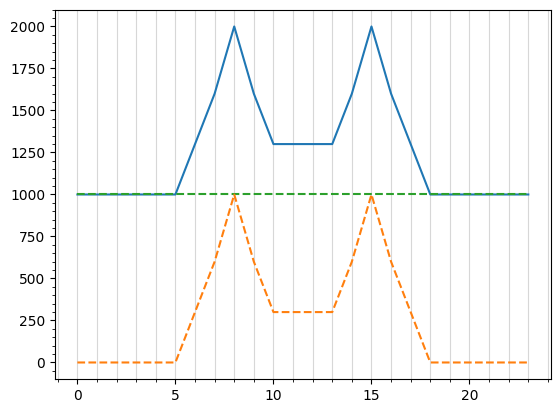

In [325]:
x = np.linspace(0, 23, 24)

y_elec, y_elec_price, y_elec_carbon, y_nuclear, y_gas = get_grid_prices_day()

# Plotting
plt.plot(x, y_elec)
plt.plot(x, y_nuclear,'tab:green' ,linestyle='dashed')
plt.plot(x, y_gas,'tab:orange', linestyle='dashed' )
# Small Grid
plt.minorticks_on()
plt.grid(True, which='both', axis='x', alpha=0.5)


## Total Plots

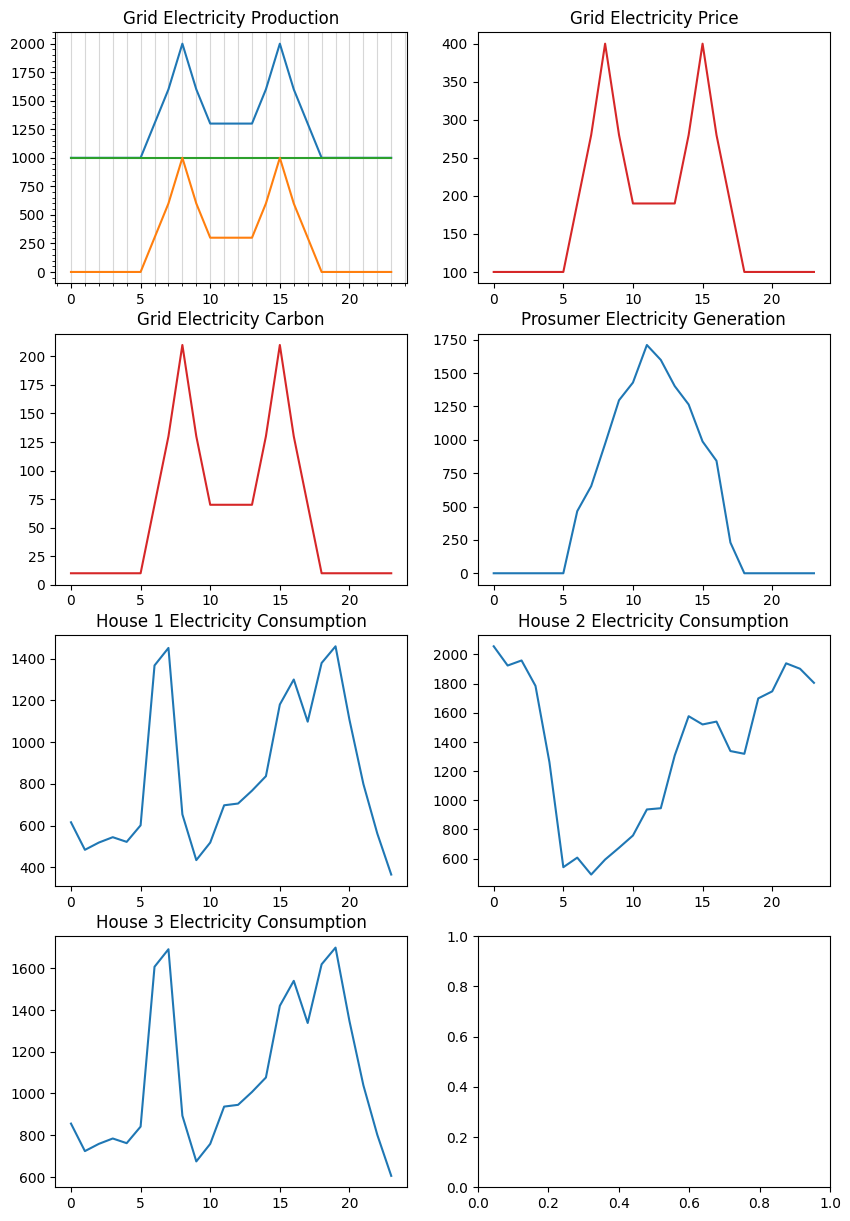

In [326]:

fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2)
fig.set_size_inches(10, 15)

# Plotting
ax1.set_title('Grid Electricity Production');
ax1.plot(x, y_elec, 'tab:blue')
ax1.plot(x, y_nuclear, 'tab:green')
ax1.plot(x, y_gas, 'tab:orange')
# Small Grid
ax1.minorticks_on()
ax1.grid(True, which='both', axis='x', alpha=0.5)

ax2.plot(x, y_elec_price, 'tab:red')
ax2.set_title('Grid Electricity Price');

ax3.plot(x, y_elec_carbon, 'tab:red')
ax3.set_title('Grid Electricity Carbon');

# Generation House 1
ax4.plot(x, y_gen)
ax4.set_title('Prosumer Electricity Generation');

# Demand House 1
ax5.plot(x, y_demand_1)
ax5.set_title('House 1 Electricity Consumption');

# Demand House 2
ax6.plot(x, y_demand_2)
ax6.set_title('House 2 Electricity Consumption');

# Demand House 3
ax7.plot(x, y_demand_3)
ax7.set_title('House 3 Electricity Consumption');

# Environment

In [327]:
TIME = 24 # 24 hours
NUM_OBS = 8

time = -1
state = np.zeros((NUM_OBS, TIME)) 
state[0] = np.linspace(0, 23, 24) # hours
state[1] = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29]) # temperature
state[2] = get_generation_PV()[0] # generation
state[3] = get_demand_h1(state[1])[0] # demand, needs temp
state[4] = state[3] - state[2] # net 
state[5] = get_grid_prices_day()[1] # grid energy price selling by Grid
state[6] = get_grid_prices_day()[1] * 0.90 # grid energy price buying by Grid

state[7] = get_grid_prices_day()[2] # grid energy carbon
# State[8] starts in 0 -  SOC battery of house 1
state[0,9] # Row 0, time 9
state[:,0] # Row 0 complete, entire observation
# normalize 
# for row in state:
#     row = (row - row.min()) / (row.max() - row.min())
    # print(row)

array([  0.        ,  31.        ,   0.        , 615.84314076,
       615.84314076, 100.        ,  90.        ,  10.        ])

In [477]:
TIME = 24 # 24 hours
NUM_OBS = 9 
BATT_CAP = 3#3000 # 3kWh

# No batches
class HouseEnergy:
  def __init__(self):
    self.time = 0
    self.state = np.zeros((NUM_OBS, TIME)) 
    self.state[0] = np.linspace(0, 23, 24) # hours
    self.state[1] = np.array([31,30,30,29,29,28,27,26,28,29,31,33,34,36,37,36,35,33,32,31,30,30,29,29]) # temperature
    self.state[2] = 0#get_generation_PV()[0] # generation
    self.state[3] = 1#get_demand_h1(self.state[1])[0] # demand, needs temp
    self.state[4] = self.state[3] - self.state[2] # net 
    self.state[5] = 2#get_grid_prices_day()[1] # grid energy price selling by Grid
    self.state[6] = 0.5#self.state[5]* 0.90 # grid energy price buying by Grid

    self.state[7] = get_grid_prices_day()[2] # grid energy carbon
    # State[8] starts in 0 -  SOC battery of house 1
    # self.state = normalize_2d(self.state)

  def get_reward(self):
    #TODO price house pays
    net = self.state[4, self.time]
    cost = net *  self.state[5, self.time]

    # cost of electricity from grid and carbon
    # net = self.state[4, self.time]
    # if net >= 1:
    #   cost = net *  ( self.state[5, self.time] + self.state[7, self.time])
    # else:
    #   cost = net * self.state[6, self.time]
    # add if battery is used
    # cost -= self.state[8] * self.state[6]
    return cost 

# Reset
  def reset(self):
    self.state[4] = self.state[3] - self.state[2] # net
    self.state[8] = 0 # SOC battery of house 1 , restart
    self.time = 0
    return state[:,0]

# Step
  def step(self, action): # action are prices for buying and selling own electricity
    if self.time == 23:
      return self.state[:, self.time], self.get_reward(), True
    # Estimate SOC battery and new net
    charge = action * BATT_CAP 
    prev_SOC = self.state[8, self.time]
    new_SOC = prev_SOC + action
    if(action>0): # if charging
      if(new_SOC > 1): # if charging more than capacity
        delta = new_SOC - prev_SOC
        self.state[4, self.time] += (delta * BATT_CAP) # net with battery cost added 
        self.state[8, self.time] = 1 # full battery
      else:
        self.state[8, self.time] = new_SOC
        self.state[4, self.time] += charge # net with battery cost added
    elif(action<0): # discharging
      if(self.state[8, self.time] > 0): # there is energy in the battery
        if(new_SOC < 0): # not enough energy in battery for action
          delta = new_SOC - prev_SOC
          self.state[4, self.time] += (delta * BATT_CAP) # net with battery cost substracted 
          self.state[8, self.time] = 0 # empty battery
        else: # enough energy in battery for action
          self.state[8, self.time] = new_SOC
          self.state[4, self.time] += charge
      # else battery empty, do nothing
    # action = 0, do nothing
  
    
    curr_state = self.state[:,self.time]
    reward = self.get_reward()
    self.time +=1
    # Return state, reward, done
    return curr_state, reward , self.time >= TIME

In [460]:
env = HouseEnergy()
obs = env.reset()

action = 0
# env.step(action)
obs, rew, done = env.step(action)
# obs,rew,done

In [461]:
obs

array([ 0. , 31. ,  0. ,  1. ,  1. ,  2. ,  0.5, 10. ,  0. ])

In [462]:
normalize_2d(obs)

array([0.        , 0.94891784, 0.        , 0.03061025, 0.03061025,
       0.06122051, 0.01530513, 0.30610253, 0.        ])

## Zero action actor

In [420]:
env = HouseEnergy()
obs = env.reset()

action = 0

done = 0
total_obs, total_rewards, total_actions = [], [], []
total_actions = np.array(total_actions)
total_rewards = np.array(total_rewards)
total_actions = np.array(total_actions)

# normalize_2d(matrix)

while not done: # Loop through the year
    obs, rew, done = env.step(action)
    norm_obs = normalize_2d(obs)

    total_obs = np.append(total_obs,obs)
    total_rewards = np.append(total_rewards,rew)
    total_actions = np.append(total_actions,action)
    

total_rewards.sum()

-48.0

## Random Actor

In [454]:
set_rand_seed(0)
env = HouseEnergy()
obs = env.reset()

action = 0

obs, rew, done = env.step(action)

total_obs, total_rewards, total_actions = [], [], []

while not done: # Loop through the year
    # use obs to predict action
    action = np.random.uniform(-1,1)
    total_obs.append(obs)
    total_rewards.append(rew)
    total_actions.append(action)
    obs, rew, done = env.step(action)
    

total_actions = np.array(total_actions)
total_obs = np.array(total_obs)
total_rewards = np.array(total_rewards)
total_rewards.sum()

-93.8296733456117

In [456]:
total_obs.max()

210.0

## A2C

In [457]:
class Actor(nn.Module):
    def __init__(self, obs_dim, act_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(obs_dim, 256)
        self.fc2 = nn.Linear(256, act_dim)
    def forward(self, obs):
        x = F.relu(self.fc1(obs))
        x = F.softmax(self.fc2(x), dim=0)
        return x

class Critic(nn.Module):
    def __init__(self, obs_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(obs_dim, 256)
        self.fc2 = nn.Linear(256, 1)
    def forward(self, obs):
        x = F.relu(self.fc1(obs))
        x = self.fc2(x)
        return x

In [488]:
set_rand_seed(0)
env = HouseEnergy()

# gamma = 0.99
episodes_completed = 50
discrete_actions = [-0.2,-0.17 -0.15, -0.12, -0.1, -0.07, -0.05, -0.03, 0,0.03, 0.05, 0.07, 0.1, 0.12, 0.15, 0.17, 0.2]
act_dim = len(discrete_actions)
obs_dim = NUM_OBS
actor = Actor(obs_dim, act_dim)
critic = Critic(obs_dim)

critic_loss = nn.MSELoss()
actor_optimizer = optim.Adam(actor.parameters(), lr=0.001)
critic_optimizer = optim.Adam(critic.parameters(), lr=0.0005)

for episode in range(episodes_completed):    # run 1000 episodes
    obs = env.reset()
    
    total_rewards ,total_obs, total_actions, log_a, state_value = [], [],[], [], []

    done = 0

    obs, rew, done = env.step(action)

    # Loop through the day
    while not done: 
        # Normalize #TODO fix
        norm_obs = normalize_2d(obs)
        obs_t = torch.Tensor(obs)
        
        # for row in obs_t:
        #     row = (row - row.min()) / (row.max() - row.min())

        prob = actor(obs_t)
        s_value = critic(obs_t)
        m = Categorical(prob)
        act_index = m.sample()
        discrete_act = discrete_actions[act_index]
        # obs, rew, done = env.step(action)


        # Append data for analysing 
        total_obs.append(obs)
        total_rewards.append(rew)
        total_actions.append(action)
        log_a.append(m.log_prob(act_index))
        state_value.append(s_value)

        obs, rew, done = env.step(discrete_act)
    # Calc loss
    # for r, l, v in zip(reward_to_go, log_a, state_value):
    for r, l, v in zip(total_rewards, log_a, state_value):
        loss = - l * (r - v.item())
        loss.backward()
        value_loss = critic_loss(v, torch.tensor([r]).float())
        value_loss.backward()
    actor_optimizer.step()
    actor_optimizer.zero_grad()
    critic_optimizer.step()
    critic_optimizer.zero_grad()
    
    if episode % 5 == 0:
        avg_reward = np.sum(total_rewards)
        print(f"Episode complete: {episode} | Avg reward {round(avg_reward,3)} | Actor Loss: {round(loss.item(),3)} |  Critic Loss: {round(value_loss.item(),3)}" ,flush=True)


total_actions = np.array(total_actions)
total_obs = np.array(total_obs)
total_rewards = np.array(total_rewards)
total_rewards.sum()

Episode complete: 0 | Avg reward 56.08 | Actor Loss: 13.54 |  Critic Loss: 50.315
Episode complete: 5 | Avg reward 57.1 | Actor Loss: 2.311 |  Critic Loss: 15.357
Episode complete: 10 | Avg reward 52.12 | Actor Loss: 0.165 |  Critic Loss: 2.463
Episode complete: 15 | Avg reward 52.12 | Actor Loss: -0.017 |  Critic Loss: 0.072
Episode complete: 20 | Avg reward 55.36 | Actor Loss: -0.063 |  Critic Loss: 1.743
Episode complete: 25 | Avg reward 57.82 | Actor Loss: -6.11 |  Critic Loss: 2.346
Episode complete: 30 | Avg reward 55.18 | Actor Loss: -0.008 |  Critic Loss: 1.269
Episode complete: 35 | Avg reward 56.2 | Actor Loss: -0.002 |  Critic Loss: 0.215
Episode complete: 40 | Avg reward 57.22 | Actor Loss: 0.0 |  Critic Loss: 0.013
Episode complete: 45 | Avg reward 57.22 | Actor Loss: 0.001 |  Critic Loss: 0.166


56.2

## Results

24 23


ValueError: x and y must have same first dimension, but have shapes (24,) and (23,)

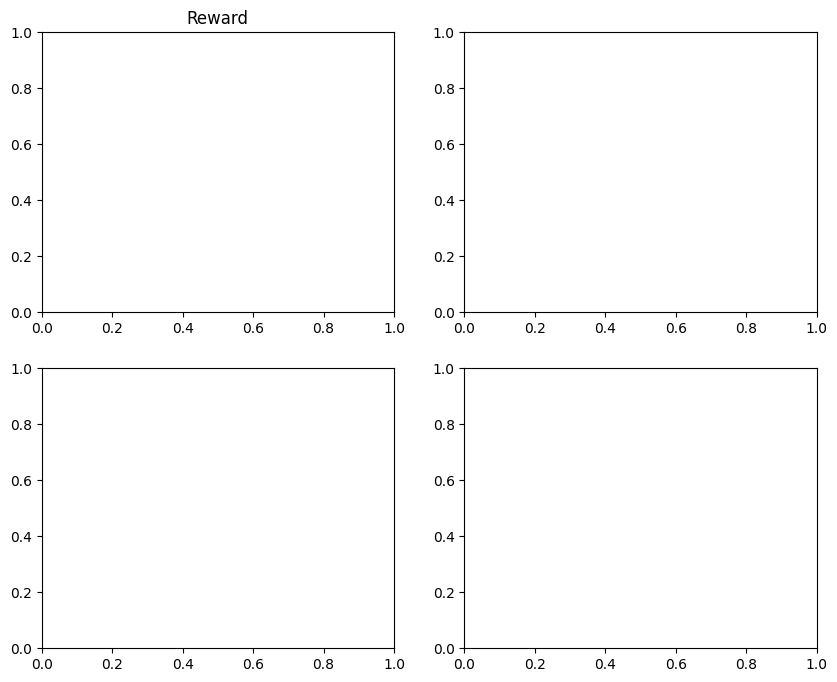

In [473]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(10, 8)

ax1.set_title('Reward');
print(len(x), len(total_rewards))
ax1.plot(x, total_rewards, 'tab:blue')

ax2.set_title('Actions');
ax2.plot(x, total_actions, 'tab:green')

ax3.set_title('Net_Electricity');
ax3.plot(x, total_obs[:,4], 'tab:red')

ax4.set_title('SOC');
ax4.plot(x, total_obs[:,8], 'tab:grey')

In [ ]:
def rollout(actor, env):
    env.reset()
    done = False
    log_probs, rewards = [],[]

    while not done:
        action = actor.predict(state)
        

        state, reward, done = env.step(action)

        rewards.append(reward)
        log_probs.append(log_ prob)
    return log_probs, rewards

In [ ]:
log_probs, rewards = rollout(actor, env)

In [ ]:
env = HouseEnergy()
